# Exo 5: Hackathon ( Lien entre la pratique des dépassements d'honoraires des medecins et la densité de la population)
  

#### Il s'agit de répondre aux questions suivantes : Y a t-il un lien entre les dépassements d'honoraires des medecins et la densité des medecins sur les départements de France?  Peut-on déduire une relation entre la densité de la population et la pratique des dépassements d'honoraires médicales?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Analyse de la relation entre les dépassements d'honoraires et la densité des medecins

In [2]:
xls_honoraires = pd.ExcelFile('Honoraires_totaux_des_professionnels_de_sante_par_departement_en_2014.xls')

### Spécialistes

In [50]:


df_honoraires_spe_init = xls_honoraires.parse('Spécialistes', na_values='nc')

# Suppression des valeurs null
df_honoraires_spe_init.dropna(how= 'any', inplace = True)
df_honoraires_spe_init.head()


,Spécialistes,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENT (Euros),TOTAL DES HONORAIRES (Euros)
0,02- Anesthésie-réanimation chirurgicale,01- Ain,15,4421850.0,2059109.0,0.0,6480959.0
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,22,4655627.0,273935.0,7.0,4929569.0
2,02- Anesthésie-réanimation chirurgicale,03- Allier,18,5033545.0,462068.0,14.0,5495627.0
5,02- Anesthésie-réanimation chirurgicale,06- Alpes-Maritimes,103,23167470.0,10241366.0,4.0,33408840.0
6,02- Anesthésie-réanimation chirurgicale,07- Ardèche,23,5197673.0,841267.0,0.0,6038940.0


In [51]:
# Suppression des lignes des totaux 
df_honoraires_spe = df_honoraires_spe_init[df_honoraires_spe_init.DEPARTEMENT.str.match('(TOTAL.*)') == False]

df_honoraires_spe = df_honoraires_spe[df_honoraires_spe.Spécialistes.str.match('(TOTAL.*)')==False]
df_honoraires_spe.head()

,Spécialistes,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENT (Euros),TOTAL DES HONORAIRES (Euros)
0,02- Anesthésie-réanimation chirurgicale,01- Ain,15,4421850.0,2059109.0,0.0,6480959.0
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,22,4655627.0,273935.0,7.0,4929569.0
2,02- Anesthésie-réanimation chirurgicale,03- Allier,18,5033545.0,462068.0,14.0,5495627.0
5,02- Anesthésie-réanimation chirurgicale,06- Alpes-Maritimes,103,23167470.0,10241366.0,4.0,33408840.0
6,02- Anesthésie-réanimation chirurgicale,07- Ardèche,23,5197673.0,841267.0,0.0,6038940.0


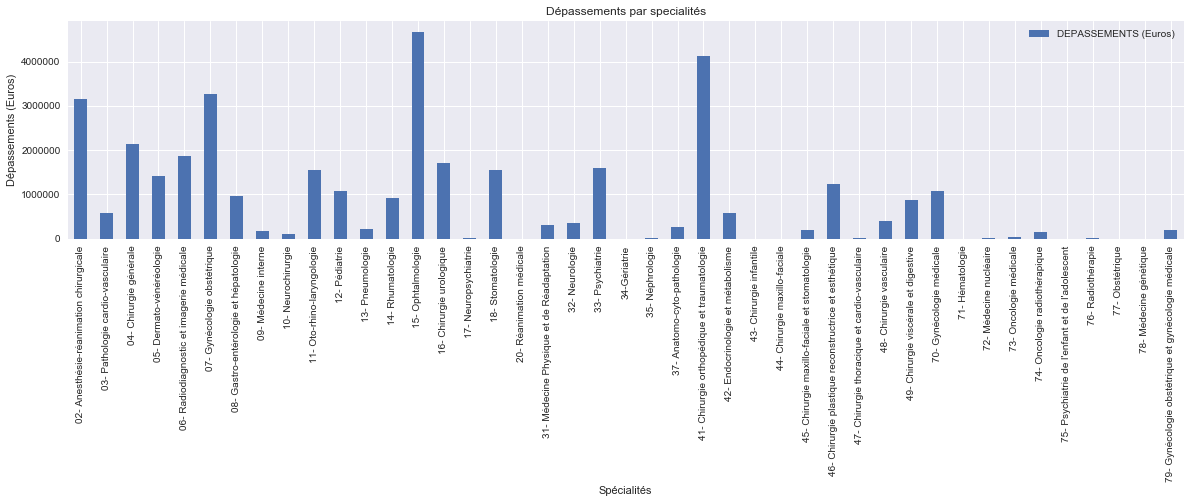

In [6]:
# plot les dépassements Honoraires par spécialités 

subset = df_honoraires_spe[['Spécialistes', 'DEPASSEMENTS (Euros)']].groupby('Spécialistes').agg(np.mean)
subset.plot(kind='bar', figsize=(20,4), title ='Dépassements par specialités')
plt.xlabel('Spécialités')
plt.ylabel('Dépassements (Euros)')


### On peut voir que les spécialités qui pratiquent les dépassements les plus importants sont : l'ophtalmologie et la chirurgie orthopédique suivies de la gynecologie obstétrique et l'anesthésie-Réanimation chirurgicale.

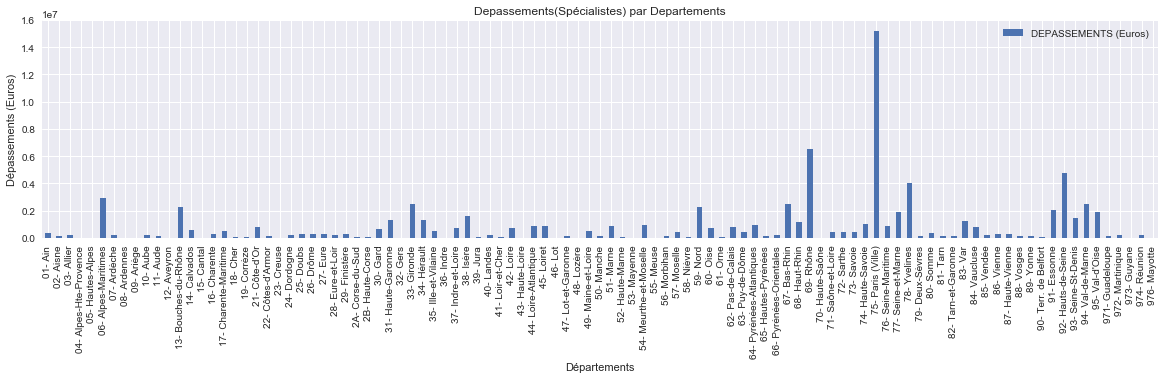

In [7]:
# plot les dépassements Honoraires par régions 
subset_geo = df_honoraires_spe[['DEPARTEMENT','DEPASSEMENTS (Euros)']].groupby(['DEPARTEMENT']).agg(np.mean)
    
subset_geo.plot(kind='bar', figsize=(20,4),title ='Depassements(Spécialistes) par Departements')
plt.xlabel('Départements')
plt.ylabel('Dépassements (Euros)')


### On peut constater que Paris enregistre le taux le plus important en terme de dépassements d'honoraires dse spécialistes suivi du département du Rhône et des hauts de seine.

Nous vérifierons dans ce qui suit si les dépassements sont corrélés à l'effectif des medécins par département

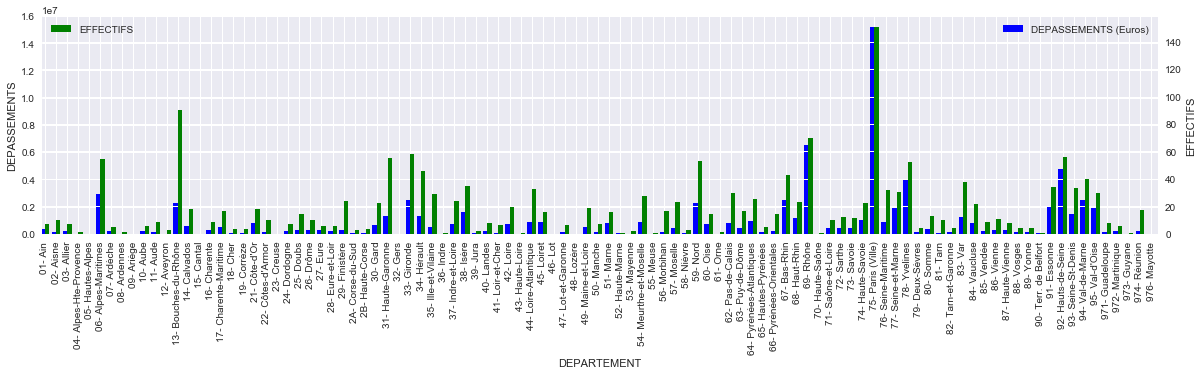

In [8]:
subset_effectif = df_honoraires_spe[['DEPARTEMENT','EFFECTIFS', 'DEPASSEMENTS (Euros)']].groupby(['DEPARTEMENT']).agg(np.mean)
#subset_effectif['Effectif
#ax = subset_effectif[['DEPASSEMENTS (Euros)','EFFECTIFS']].plot(kind='bar', figsize=(20,4),\
#                                               title ='Depassements Vs Effectifs des Spécialistes par Departement')
#plt.xlabel('Départements')
#plt.ylabel('Dépassements (Euros)')

fig = plt.figure( figsize=(20,4)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

subset_effectif[['DEPASSEMENTS (Euros)']].plot(kind='bar', color='blue', ax=ax, width=width, position=1)
subset_effectif[['EFFECTIFS']].plot(kind='bar', color='green', ax=ax2, width=width, position=0)

ax.set_ylabel('DEPASSEMENTS')
ax2.set_ylabel('EFFECTIFS')
plt.legend(loc='upper left')
plt.show()

#subset_effectif[['EFFECTIFS']].plot(kind='bar')


## A partir du graphe ci-dessus on peut constater que les dépassements ne sont pas corrélés directement aux effectifs de médecins dans les départements: sur Paris et département du Rhone par exemple on enregistre un très fort taux de dépassement honoraires hormis une importante densité de medecins 

On s'interesse dans ce qui suit aux médecins généralistes et on refait le même type d'analyse 

In [9]:
df_honoraires_gen_init = xls_honoraires.parse('Généralistes et MEP', na_values='nc')

# Suppression des valeurs null
df_honoraires_gen_init.dropna(how= 'any', inplace = True)
df_honoraires_gen_init.columns = ['Généralistes_MEP', 'DEPARTEMENT', 'EFFECTIFS',
       'HONORAIRES SANS DEPASSEMENT (Euros)', 'DEPASSEMENTS (Euros)',
       'FRAIS DE DEPLACEMENT (Euros)', 'TOTAL DES HONORAIRES (Euros)']
df_honoraires_gen_init

,Généralistes_MEP,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENT (Euros),TOTAL DES HONORAIRES (Euros)
0,01- Médecine générale,01- Ain,387,54708468.0,544536.0,273568.0,55526572.0
1,01- Médecine générale,02- Aisne,370,64692167.0,316633.0,357630.0,65366430.0
2,01- Médecine générale,03- Allier,249,36055432.0,55748.0,368883.0,36480063.0
3,01- Médecine générale,04- Alpes-Hte-Provence,159,22188985.0,101450.0,341958.0,22632393.0
4,01- Médecine générale,05- Hautes-Alpes,152,19210311.0,259858.0,179646.0,19649815.0
5,01- Médecine générale,06- Alpes-Maritimes,1166,143498917.0,6072337.0,1034885.0,150606139.0
6,01- Médecine générale,07- Ardèche,249,35248645.0,261064.0,260822.0,35770531.0
7,01- Médecine générale,08- Ardennes,231,40134337.0,26064.0,205338.0,40365739.0
8,01- Médecine générale,09- Ariège,139,21090850.0,13848.0,350355.0,21455053.0
9,01- Médecine générale,10- Aube,213,35968205.0,146094.0,184931.0,36299230.0


In [10]:
# Suppression des lignes des totaux 
df_honoraires_gen = df_honoraires_gen_init[df_honoraires_gen_init.DEPARTEMENT.str.match('(TOTAL.*)') == False]

#df_honoraires_gen = df_honoraires[df_honoraires_gen.Généralistes_MEP.str.match('(TOTAL.*)')==False]
df_honoraires_gen

,Généralistes_MEP,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENT (Euros),TOTAL DES HONORAIRES (Euros)
0,01- Médecine générale,01- Ain,387,54708468.0,544536.0,273568.0,55526572.0
1,01- Médecine générale,02- Aisne,370,64692167.0,316633.0,357630.0,65366430.0
2,01- Médecine générale,03- Allier,249,36055432.0,55748.0,368883.0,36480063.0
3,01- Médecine générale,04- Alpes-Hte-Provence,159,22188985.0,101450.0,341958.0,22632393.0
4,01- Médecine générale,05- Hautes-Alpes,152,19210311.0,259858.0,179646.0,19649815.0
5,01- Médecine générale,06- Alpes-Maritimes,1166,143498917.0,6072337.0,1034885.0,150606139.0
6,01- Médecine générale,07- Ardèche,249,35248645.0,261064.0,260822.0,35770531.0
7,01- Médecine générale,08- Ardennes,231,40134337.0,26064.0,205338.0,40365739.0
8,01- Médecine générale,09- Ariège,139,21090850.0,13848.0,350355.0,21455053.0
9,01- Médecine générale,10- Aube,213,35968205.0,146094.0,184931.0,36299230.0


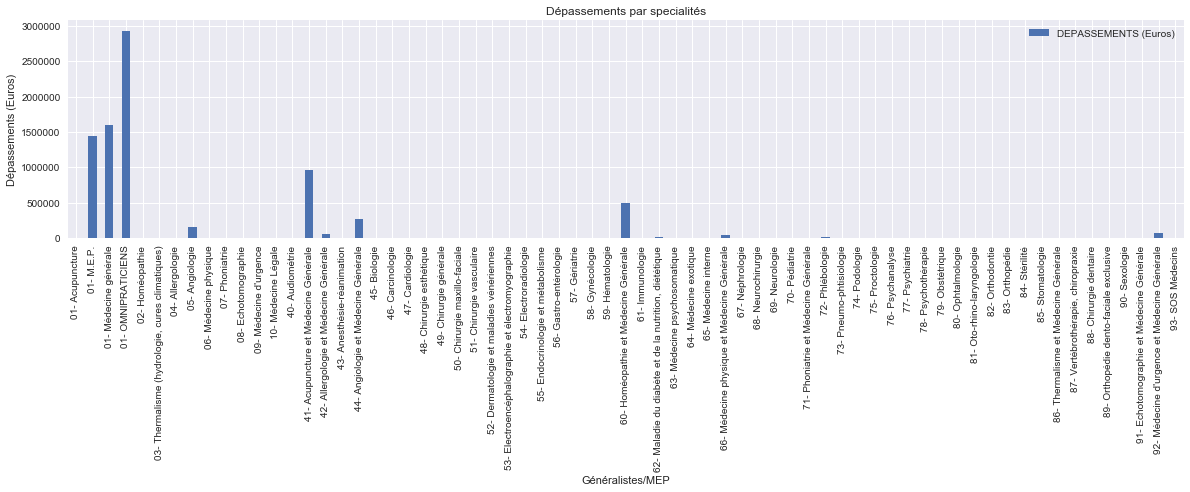

In [11]:
# plot les dépassements Honoraires par Generaliste/MEP

subset_gen = df_honoraires_gen[['Généralistes_MEP', 'DEPASSEMENTS (Euros)']].groupby('Généralistes_MEP').agg(np.mean)
subset_gen.plot(kind='bar', figsize=(20,4), title ='Dépassements par specialités')
plt.xlabel('Généralistes/MEP')
plt.ylabel('Dépassements (Euros)')



### Ce sont les ominprates qui pratiquent les plus gros dépassements suivis des medecins généralistes

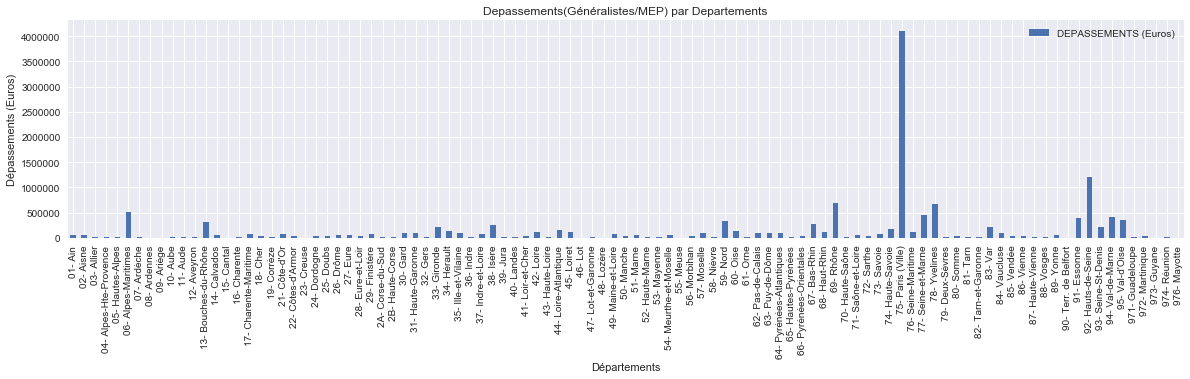

In [17]:
# plot les dépassements Honoraires par régions 
subset_gen_geo = df_honoraires_gen[['DEPARTEMENT','DEPASSEMENTS (Euros)']].groupby(['DEPARTEMENT']).agg(np.mean)
    
subset_gen_geo.plot(kind='bar', figsize=(20,4),title ='Depassements(Généralistes/MEP) par Departements')
plt.xlabel('Départements')
plt.ylabel('Dépassements (Euros)')



### Là aussi la ville de Paris détient la premièere place en terme de dépassements honoraires des médedcins généralistes/MEP suivi du département des hauts de seine.

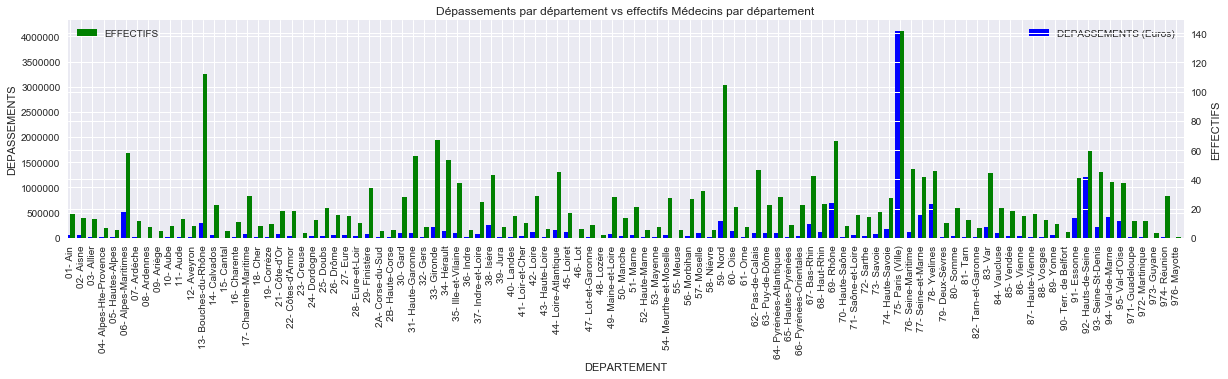

In [52]:
subset_gen = df_honoraires_gen[['DEPARTEMENT','EFFECTIFS', 'DEPASSEMENTS (Euros)']].groupby(['DEPARTEMENT']).\
                            agg(np.mean)


fig = plt.figure( figsize=(20,4)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

subset_gen[['DEPASSEMENTS (Euros)']].plot(kind='bar', color='blue', ax=ax, width=width, position=1)
subset_gen[['EFFECTIFS']].plot(kind='bar', color='green', ax=ax2, width=width, position=0)

ax.set_ylabel('DEPASSEMENTS')
ax2.set_ylabel('EFFECTIFS')
plt.legend(loc='upper left')
plt.title('Dépassements par département vs effectifs Médecins par département')
plt.show()

#subset_effectif[['EFFECTIFS']].plot(kind='bar')



### là aussi on constate à première vue que les dépassements ne sont pas corrrélés aux éffectifs des medecins

#### Nous allons analyser introduire dans ce qui suit la composante de la densité de la population dans notre analyse

# La densité de la population

In [18]:
xls_densite = pd.ExcelFile('Effectif_et_densite_par_departement_en_2014.xls')

In [19]:
xls_densite.sheet_names

['Lisez moi',
 'Nomenclature des PS',
 'Spécialistes',
 'Généralistes et MEP',
 'Auxiliaires médicaux',
 'Sages-femmes',
 'Dentistes et ODF',
 'Laboratoires']

In [53]:
df_densite_spe_init = xls_densite.parse('Spécialistes', parse_cols=[0,1,2,3,4],na_values='nc')

# Suppression des valeurs null
df_densite_spe_init.dropna(how= 'any', inplace = True)
df_densite_spe_init

# Suppression des lignes dse totaux 
df_densite_spe = df_densite_spe_init[df_densite_spe_init.DEPARTEMENT.str.match('(TOTAL.*)') == False]

df_densite_spe = df_densite_spe[df_densite_spe.Spécialistes.str.match('(TOTAL.*)')==False]
df_densite_spe.head()

,Spécialistes,DEPARTEMENT,EFFECTIF,POPULATION FRANCAISE,DENSITE /100 000 hab.
0,02- Anesthésie-réanimation chirurgicale,01- Ain,15,627405.0,2.390800
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,22,540409.0,4.070991
2,02- Anesthésie-réanimation chirurgicale,03- Allier,18,342593.0,5.254048
3,02- Anesthésie-réanimation chirurgicale,04- Alpes-Hte-Provence,5,162438.0,3.078097
4,02- Anesthésie-réanimation chirurgicale,05- Hautes-Alpes,7,141911.0,4.932669


In [54]:
# merger les deux data frames ( densité et dépassement)

df_densite_spe['index_spe_dept'] = df_densite_spe['Spécialistes'].str.extract('(^[\d]{2})', expand = True) + \
df_densite_spe['DEPARTEMENT'].str.extract('(^[\dAB]{2,3})', expand=True)
df_honoraires_spe['index_spe_dept'] = df_honoraires_spe['Spécialistes'].str.extract('(^[\d]{2})', expand = True) + \
df_honoraires_spe['DEPARTEMENT'].str.extract('(^[\dAB]{2,3})', expand=True)

df_densite_spe.head()


,Spécialistes,DEPARTEMENT,EFFECTIF,POPULATION FRANCAISE,DENSITE /100 000 hab.,index_spe_dept
0,02- Anesthésie-réanimation chirurgicale,01- Ain,15,627405.0,2.390800,0201
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,22,540409.0,4.070991,0202
2,02- Anesthésie-réanimation chirurgicale,03- Allier,18,342593.0,5.254048,0203
3,02- Anesthésie-réanimation chirurgicale,04- Alpes-Hte-Provence,5,162438.0,3.078097,0204
4,02- Anesthésie-réanimation chirurgicale,05- Hautes-Alpes,7,141911.0,4.932669,0205


In [27]:

df_spe = df_densite_spe.merge(df_honoraires_spe,on = 'index_spe_dept')[['Spécialistes_x','DEPARTEMENT_x',\
                            'EFFECTIF', 'POPULATION FRANCAISE','DENSITE /100 000 hab.','DEPASSEMENTS (Euros)' ]]
df_spe.columns =['Spécialistes','DEPARTEMENT',\
                            'EFFECTIF', 'POPULATION FRANCAISE','DENSITE /100 000 hab.','DEPASSEMENTS (Euros)' ]

df_spe.head()

,Spécialistes,DEPARTEMENT,EFFECTIF,POPULATION FRANCAISE,DENSITE /100 000 hab.,DEPASSEMENTS (Euros)
0,02- Anesthésie-réanimation chirurgicale,01- Ain,15,627405.0,2.390800,2059109.0
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,22,540409.0,4.070991,273935.0
2,02- Anesthésie-réanimation chirurgicale,03- Allier,18,342593.0,5.254048,462068.0
3,02- Anesthésie-réanimation chirurgicale,06- Alpes-Maritimes,103,1083268.0,9.508266,10241366.0
4,02- Anesthésie-réanimation chirurgicale,07- Ardèche,23,321252.0,7.159489,841267.0


In [32]:
# On s'interesse aux dépassements par médecin 

df_spe['DEPASSEMENTS/Effectif Medecin'] = df_spe['DEPASSEMENTS (Euros)']/df_spe['EFFECTIF']
#drop  les lignes Nan ( effectifs = 0)
df_spe.dropna(axis = 0, how = 'any', inplace = True)
df_spe

,Spécialistes,DEPARTEMENT,EFFECTIF,POPULATION FRANCAISE,DENSITE /100 000 hab.,DEPASSEMENTS (Euros),DEPASSEMENTS/Effectif Medecin
0,02- Anesthésie-réanimation chirurgicale,01- Ain,15,627405.0,2.390800,2059109.0,1.372739e+05
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,22,540409.0,4.070991,273935.0,1.245159e+04
2,02- Anesthésie-réanimation chirurgicale,03- Allier,18,342593.0,5.254048,462068.0,2.567044e+04
3,02- Anesthésie-réanimation chirurgicale,06- Alpes-Maritimes,103,1083268.0,9.508266,10241366.0,9.943074e+04
4,02- Anesthésie-réanimation chirurgicale,07- Ardèche,23,321252.0,7.159489,841267.0,3.657683e+04
6,02- Anesthésie-réanimation chirurgicale,10- Aube,18,306490.0,5.872949,15229.0,8.460556e+02
7,02- Anesthésie-réanimation chirurgicale,11- Aude,15,367158.0,4.085435,228046.0,1.520307e+04
8,02- Anesthésie-réanimation chirurgicale,13- Bouches-du-Rhône,205,1996351.0,10.268735,2385052.0,1.163440e+04
9,02- Anesthésie-réanimation chirurgicale,14- Calvados,40,690836.0,5.790086,223644.0,5.591100e+03
10,02- Anesthésie-réanimation chirurgicale,16- Charente,20,354801.0,5.636963,1001505.0,5.007525e+04


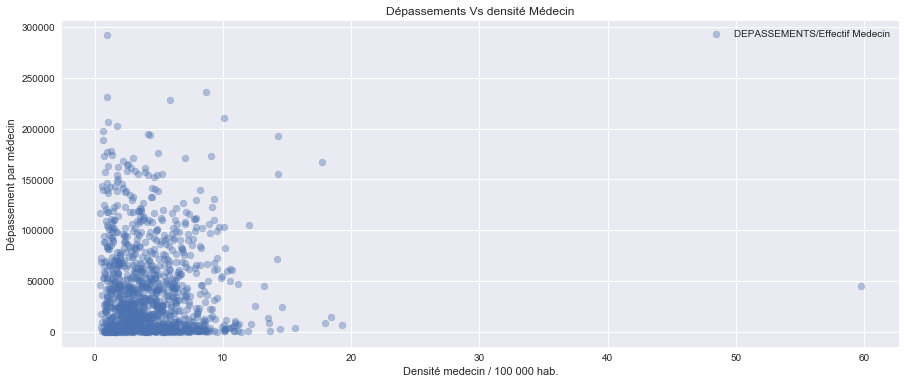

In [49]:
fig = plt.figure(figsize=(15,6)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes


plt.scatter(df_spe['DENSITE /100 000 hab.'], df_spe['DEPASSEMENTS/Effectif Medecin'], alpha=0.40)

plt.xlabel('Densité medecin / 100 000 hab.')
plt.ylabel('Dépassement par médecin')
plt.title('Dépassements Vs densité Médecin')
plt.legend()

## On peut voir à partir du graphe  qu'il n'y a pas de corrélation entre la densité des medecins spécialistes et les dépassements d'honoraires pratiqués.